In [105]:
"""
!python -m spacy download en_core_web_sm
!pip install -U spacy
!pip install -U amrlib
!pip show amrlib
"""

'\n!python -m spacy download en_core_web_sm\n!pip install -U spacy\n!pip install -U amrlib\n!pip show amrlib\n'

In [45]:
# data path
data_path = '../data/'
data_path_metrics = '../data/metrics/'
data_path_temp = '../data/temp/'
data_path_prolog = '../data/prologData/'

type =  "test" #     "train" #  

#  Data analysis and augmentation

In [46]:
import pandas as pd
df  = pd.read_csv(data_path + 'trial.csv')
print("trial data shape: ", df.shape)
print(df["num_statements"].value_counts())
df = pd.read_csv(data_path + 'train.csv')
print("train data shape: ", df.shape)
print(df["num_statements"].value_counts())
df = pd.read_csv(data_path + 'test.csv')
print("test data shape: ", df.shape)
print(df["num_statements"].value_counts())
df = pd.read_csv(data_path + 'augmented.csv')
print("test data shape: ", df.shape)
print(df["num_statements"].value_counts())


trial data shape:  (26, 11)
1    15
2     9
3     1
0     1
Name: num_statements, dtype: int64
train data shape:  (2944, 10)
1    1530
2     732
0     449
3     191
4      38
5       3
6       1
Name: num_statements, dtype: int64
test data shape:  (416, 10)
1    258
2    123
3     28
4      6
5      1
Name: num_statements, dtype: int64
test data shape:  (1207, 10)
2    739
3    384
4     76
5      6
6      2
Name: num_statements, dtype: int64


In [47]:
# read in data. train data is combined with trial data

import pandas as pd

# open train.csv
df = pd.read_csv(data_path+ type + '.csv')
df_trial = pd.read_csv(data_path+ 'trial.csv')

if type == "train":
    df = pd.concat([df,df_trial], join="inner")
    df = df.drop_duplicates(subset=['sent-id'], keep='last')



### Data augmentation

unballanced data => data augmentation for examples with num_statements >1 
method: round-trip translation

In [363]:
# Careful, takes time to run
# for each sentence, if num_statements > 1 then translate to Finnish and back to German
import pandas as pd
from deep_translator import GoogleTranslator
if type == "train":
    df_aug = df[df['num_statements'] > 1]
    df_aug['finnish'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='fi').translate(x))
    df_aug['german'] = df_aug['finnish'].apply(lambda x: GoogleTranslator(source='fi', target='de').translate(x))

In [372]:
df_aug["phrase"] = df_aug["german"]
df_aug.drop(columns=["finnish", "german"], inplace=True)
df_aug["sent-id"] = df_aug["sent-id"].apply(lambda x: x + 1000000)
print(df_aug.shape)


(973, 10)


In [374]:
df_aug.to_csv(data_path_temp + 'finnish_augm.csv', index=False)

In [389]:
df_aug = pd.read_csv(data_path_temp + 'finnish_augm.csv')
df_orig = df
df = pd.concat([df, df_aug], join="inner")



In [390]:
df["num_statements"].value_counts()

1    1545
2    1478
0     449
3     384
4      76
5       6
6       2
Name: num_statements, dtype: int64

In [385]:
# alternatively, you can the dictionary containing languages mapped to their abbreviation
langs_dict = GoogleTranslator().get_supported_languages(as_dict=True)  # output: {arabic: ar, french: fr, english:en etc..
langs_dict

{'afrikaans': 'af',
 'albanian': 'sq',
 'amharic': 'am',
 'arabic': 'ar',
 'armenian': 'hy',
 'assamese': 'as',
 'aymara': 'ay',
 'azerbaijani': 'az',
 'bambara': 'bm',
 'basque': 'eu',
 'belarusian': 'be',
 'bengali': 'bn',
 'bhojpuri': 'bho',
 'bosnian': 'bs',
 'bulgarian': 'bg',
 'catalan': 'ca',
 'cebuano': 'ceb',
 'chichewa': 'ny',
 'chinese (simplified)': 'zh-CN',
 'chinese (traditional)': 'zh-TW',
 'corsican': 'co',
 'croatian': 'hr',
 'czech': 'cs',
 'danish': 'da',
 'dhivehi': 'dv',
 'dogri': 'doi',
 'dutch': 'nl',
 'english': 'en',
 'esperanto': 'eo',
 'estonian': 'et',
 'ewe': 'ee',
 'filipino': 'tl',
 'finnish': 'fi',
 'french': 'fr',
 'frisian': 'fy',
 'galician': 'gl',
 'georgian': 'ka',
 'german': 'de',
 'greek': 'el',
 'guarani': 'gn',
 'gujarati': 'gu',
 'haitian creole': 'ht',
 'hausa': 'ha',
 'hawaiian': 'haw',
 'hebrew': 'iw',
 'hindi': 'hi',
 'hmong': 'hmn',
 'hungarian': 'hu',
 'icelandic': 'is',
 'igbo': 'ig',
 'ilocano': 'ilo',
 'indonesian': 'id',
 'irish': 'ga

In [392]:
df_aug = df_orig[df_orig['num_statements'] > 2]
print(df_aug.shape)
df_aug['chinese'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='zh-CN').translate(x))
df_aug['german'] = df_aug['chinese'].apply(lambda x: GoogleTranslator(source='zh-CN', target='de').translate(x))
df_aug[['phrase', 'chinese', 'german']].head(10)

(234, 10)


C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\2319449066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['chinese'] = df_aug['phrase'].apply(lambda x: GoogleTranslator(source='de', target='zh-CN').translate(x))
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\2319449066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['german'] = df_aug['chinese'].apply(lambda x: GoogleTranslator(source='zh-CN', target='de').translate(x))


,phrase,chinese,german
35,Im Jahr 1986 hat die UNESCO gesagt: \newline D...,1986年，联合国教科文组织表示：\newline阿勒颇老城现已成为世界遗产。,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...
41,Die größte Stadt in Syrien ist Damaskus.,叙利亚最大的城市是大马士革。,Die größte Stadt in Syrien ist Damaskus.
63,Er stirbt am 2. August 1922. \newline In Badde...,他于 1922 年 8 月 2 日去世。 \newline 于加拿大巴德克。,Er starb am 2. August 1922. \newline in Baddec...
66,Der Vater von Bell war Professor für Rede-kuns...,贝尔的父亲是一位演讲和演讲教授。,Bells Vater war Dozent für Vorlesungen und Reden.
96,Er stirbt am 26. Juni 1982. \newline In Frankf...,他于 1982 年 6 月 26 日去世。 \newline 在德国美因河畔法兰克福。,Er starb am 26. Juni 1982. \newline in Frankfu...
103,Das Buch hat er zusammen mit seiner Frau Marga...,他与妻子玛格丽特·米切尔利希 (Margarete Mitscherlich) 一起撰写了这本书。,Er schrieb das Buch zusammen mit seiner Frau M...
106,Er stirbt am 10. Februar 1837. \newline In Sa...,他于 1837 年 2 月 10 日去世。 \newline 在俄罗斯圣彼得堡。,Er starb am 10. Februar 1837. \newline in St. ...
110,Er stirbt am 23. September 1973. \newline In A...,他于 1973 年 9 月 23 日去世。 \newline 在英格兰萨福克郡奥尔德堡。,Er starb am 23. September 1973. \newline In Al...
121,Sie stirbt am 14. April 2010. \newline In Sain...,她于 2010 年 4 月 14 日去世。 \newline 法国普罗旺斯-阿尔卑斯-蓝色海...,Sie starb am 14. April 2010. \newline Saint-Ré...
187,Eine Allee ist lang \newline und hat rechts u...,一条大道很长 \newline ，左右都有树。,Eine lange Allee \newline hat auf beiden Seite...


In [393]:
df_aug["phrase"] = df_aug["german"]
df_aug.drop(columns=["chinese", "german"], inplace=True)
df_aug["sent-id"] = df_aug["sent-id"].apply(lambda x: x + 10000000)
df_aug.to_csv(data_path_temp + 'chinese_aug.csv', index=False)

C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug["phrase"] = df_aug["german"]
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug.drop(columns=["chinese", "german"], inplace=True)
C:\Users\Wiebke Petersen\AppData\Local\Temp\ipykernel_25060\869846774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [394]:
df_aug["num_statements"].value_counts()

3    192
4     38
5      3
6      1
Name: num_statements, dtype: int64

In [4]:
df_aug = pd.read_csv(data_path_temp + 'chinese_aug.csv')
df_fin = pd.read_csv(data_path_temp + 'finnish_augm.csv')
augm = pd.concat([df_aug, df_fin], join="inner")
print(augm.shape)
print(augm["num_statements"].value_counts())
print(augm.columns)
augm.to_csv(data_path + 'augmented.csv', index=False)


(1207, 10)
2    739
3    384
4     76
5      6
6      2
Name: num_statements, dtype: int64
Index(['sent-id', 'topic', 'phrase', 'phrase_number', 'genre', 'timestamp',
       'user', 'phrase_tokenized', 'num_statements', 'statement_spans'],
      dtype='object')


In [371]:
"""
# Bart for translation
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
df = df[df['num_statements'] > 1]

tokenizer.src_lang = "de_DE"


# translate to Chinese
df['Chinese'] = df['phrase'].apply(lambda x: 
                                   tokenizer(x, return_tensors="pt", padding=True, truncation=True))#.to('cuda'))
print("tokenizer Chinese done")
df['Chinese'] = df['Chinese'].apply(lambda x: model.generate(**x, forced_bos_token_id=tokenizer.lang_code_to_id["zh_CN"], max_length=128, num_beams=4, early_stopping=True))
print("model Chinese done")
df['Chinese'] = df['Chinese'].apply(lambda x: tokenizer.decode(x[0], skip_special_tokens=True))
print("decode Chinese done")

tokenizer.src_lang = "zh_CN"
# translate back to German
df['German'] = df['Chinese'].apply(lambda x: tokenizer(x, return_tensors="pt", padding=True, truncation=True).to('cuda'))
print("tokenizer German done")
df['German'] = df['German'].apply(lambda x: model.generate(**x, forced_bos_token_id=tokenizer.lang_code_to_id["de_DE"],max_length=128, num_beams=4, early_stopping=True))
print("model German done")
df['German'] = df['German'].apply(lambda x: tokenizer.decode(x[0], skip_special_tokens=True))
print("decode German done")

df[['phrase','Chinese','German']]

"""


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tokenizer Chinese done


KeyboardInterrupt: 

# AMR

## Read data

In [106]:
# read in data. train data is combined with trial data

import pandas as pd

# open train.csv

df = pd.read_csv(data_path+ type + '.csv')

if type == "augmented":
    df = pd.read_csv(data_path+ 'augmented.csv')
    print(df.shape)
    print(df["num_statements"].value_counts())

if type == "train":
    df_trial = pd.read_csv(data_path+ 'trial.csv')
    print(df.shape, df_trial.shape)
    df = pd.concat([df,df_trial], join="inner")
    print(df.shape)
    df = df.drop_duplicates(subset=['sent-id'], keep='last')
    print(df["num_statements"].value_counts())



(2944, 10) (26, 11)
(2970, 10)
1    1545
2     739
0     449
3     192
4      38
5       3
6       1
Name: num_statements, dtype: int64


## Translate and AMR of English translation

In [50]:
# CAREFUL: takes time 

# translate the text to english
from deep_translator import GoogleTranslator
df['english'] = df['phrase'].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
df.head()

ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=en&sl=auto&q=Im+Jahr+1986+erkl%C3%A4rte+die+UNESCO%3A%5CnewlineDie+Altstadt+von+Aleppo+geh%C3%B6rt+heute+zum+Weltkulturerbe. (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000014F22F97F10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [51]:
# CAREFUL: takes time 

import spacy
import amrlib
amrlib.setup_spacy_extension()

nlp = spacy.load('en_core_web_sm')


#  save amr of english in column amr
amr = []
for text in df['english']:
    doc = nlp(text)
    graphs = doc._.to_amr()
    amr.append(graphs)
df['amr'] = amr
print(len(amr),df.shape)

KeyError: 'english'

In [406]:
df.head(3)

,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr
0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","[# ::snt In 1986, UNESCO declared:\newlineThe ..."
1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,[# ::snt The largest city in Syria is Damascus...
2,10001054,alexander-graham-bell,Er starb am 2. August 1922. \newline in Baddec...,2_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=stirbt 2:=am 3:=2. 4:=August 5:=1922....,3,"[[2, 3, 4, 5], [7, 8], [9]]","He died on August 2, 1922. \newline in Baddeck...","[# ::snt He died on August 2, 1922.\n(d / die-..."


In [407]:
df.to_csv(data_path_metrics + type + '_amr.csv')

## write Prolog input 

Structure of AMRs:

In [455]:
type = "augmented"

In [456]:
import pandas as pd
df = pd.read_csv(data_path_metrics + type + '_amr.csv')

In [457]:
# remove all rows with num-statements =0
print(df.shape )
df = df[df['num_statements'] > 0]
print(df.shape )
df.to_csv(data_path_metrics + type + '_amr.csv')

(1207, 19)
(1207, 19)


In [458]:

import ast
t = df['amr'].loc[0]
tt = ast.literal_eval(t)
print(t)
print(tt)
print(tt[0])
print(transform_graph(t))


output = "[a, attr-instance, alchemist, attr-domain, [p, attr-instance, person, attr-name, [n, attr-instance, name, attr-op1, ""mary"", attr-op2, ""the"", attr-op3, ""jewess""], attr-arg1_of, [f, attr-instance, fame_01, attr-degree, [v, attr-instance, very]]]]"

['# ::snt In 1986, UNESCO declared:\\newlineThe old town of Aleppo is now a World Heritage Site.\n(d / declare-01\n      :ARG0 (o / organization\n            :name (n / name\n                  :op1 "UNESCO"))\n      :ARG2 (s / site\n            :mod (h / heritage\n                  :mod (w / world))\n            :domain (t / town\n                  :name (n2 / name\n                        :op1 "Aleppo")\n                  :mod (o2 / old))\n            :time (n3 / now))\n      :time (d2 / date-entity\n            :year 1986)\n      :mod (l / line\n            :mod o2))']
['# ::snt In 1986, UNESCO declared:\\newlineThe old town of Aleppo is now a World Heritage Site.\n(d / declare-01\n      :ARG0 (o / organization\n            :name (n / name\n                  :op1 "UNESCO"))\n      :ARG2 (s / site\n            :mod (h / heritage\n                  :mod (w / world))\n            :domain (t / town\n                  :name (n2 / name\n                        :op1 "Aleppo")\n             

In [459]:
# transform amr graph to nested list for easier manipulation with Prolog
# [t, :instance, test-01, :ARG1, [e, :instance, extend-01, :ARG1, [p, :instance, product, :name, [n, :instance, name, :op1, "SpaCy"]]], :domain, [t2, :instance, this]]
# [t, [[:instance, test-01],[:ARG1, [ e, [:instance, extend-01], [:ARG1, [ p, [:instance, product], [:name, [ n, [:instance, name], [:op1, "SpaCy"]]]]]]], [:domain, [ t2, [:instance, this]]]]

import ast

def transform_graph(g):
    # delete everything before (
    # g = list(ast.literal{eval(g))
    #print(str(ast.literal_eval(g)))
    g = list(ast.literal_eval(g))
    #print(g)
    g = str(g[0].split('\n(')[1:])
    #print(g)
    g = "(" + g 
    #print(g)
    # take care of polarty
    g = g.replace('polarity -', 'polarity negative')
    g = g.replace('polarity +', 'polarity positive')
    # remove . !  ? : ;
    g = g.replace('.', '')
    g = g.replace('!', '')
    g = g.replace('?', '')
    g = g.replace(': ', '')
    g = g.replace(';', '')
    g = g.replace("'", '')
    # replace every [ by 
    g = g.replace('[', '')
    g = g.replace(']', '')    
    # replace every / by :instance
    g = g.replace('/', ':instance')
    # replace \n by ''
    g = g.replace('\newline','')
    g = g.replace('\\n', '')
    g = g.replace('\\', '')
    g = g.strip()
    # remove spaces by single space
    g = ' '.join(g.split())
    # transform to list
    g = g.replace('(', '[')
    g = g.replace(')', ']')
    # replace ' ' by ','        
    g = g.replace(' ', ', ')
    g = g.replace('.', '!')
    g = g.replace('-', '_')
    # replace ':' by 'attr-'
    g = g.replace(':', 'attr-')
    g = g.replace(',,', ',')
    # all to lower case
    g = g.lower()
    return g






In [460]:
# in each row apply the function transform_graph to the graph in column amr and write the result in column amr_prolog
# radikale Vereinfachung, wir nehmen immer nur den Graph des 1. Satzes.


df['amr_prolog'] =[transform_graph(str(x)) for x in df["amr"]]


In [461]:
df['amr_length'] = [len(list(ast.literal_eval(g)))  for g in df["amr"]]

In [462]:
df[df['amr_length'] != 1]["num_statements"] 

2      3
4      3
6      3
7      3
8      4
15     4
16     4
44     4
96     3
99     3
157    3
171    3
172    3
245    4
263    3
269    4
418    2
455    4
615    2
616    3
624    3
633    3
848    2
884    3
885    2
886    3
887    2
Name: num_statements, dtype: int64

In [463]:
df_temp = df[['sent-id','amr_length']]
df_temp.to_csv(data_path_temp + type + "_temp_features.csv")

In [464]:

print(df.shape)
df.head(2)

(1207, 21)


,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sent-id,topic,phrase,...,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr,amr_prolog,amr_length
0,0,0,0,0,0,0,0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,...,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","['# ::snt In 1986, UNESCO declared:\\newlineTh...","[d, attr-instance, declare_01, attr-arg0, [o, ...",1
1,1,1,1,1,1,1,1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,...,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,['# ::snt The largest city in Syria is Damascu...,"[h, attr-instance, have_degree_91, attr-arg1, ...",1


In [465]:
# write file . for each row in the dataframe write "ex(",row["sent-id"], ",", row["amr"], ").\n" to the file
with open(data_path_prolog + type + '_for_prolog_amr.pl', 'w') as f:
    for index, row in df.iterrows():
        f.write("ex("+str(row["sent-id"]) + ", "+ row["amr_prolog"] + ").\n")
          




In [466]:
type

'augmented'

Run transform_all from Prolog file amr.pl. In line 1 set type to recent type.  

## Take Prolog output and compute feature matrix

Needs file features_train.txt / features_test.txt written by Prolog file amr.pl.

In [68]:
# read the file with the features. The file has the following line format: SentId; feature1, feature2, feature3, ...

def read_features_from_file(file):
    features = {}
    with open(file) as f:
        for line in f:
            # remove all spaces
            line = line.replace(" ", "")
            #line = line.replace("\n", "")
            line = line.strip()
            if ";" in line:
                id = line.split(";")[0]
                feat = line.split(";")[1]
                if "," in feat:
                    feature_list = feat.split(",")
                    features[id] = feature_list
                else: 
                    print("Error")
            else:
#                print("Error")
                print(line)
    return features


In [69]:
# generate feature matrix

def make_feature_matrix(features):
    formatted_data = []
    for key, value in features.items():
        for feature in value:
            formatted_data.append({'sent-id': key, 'Feature': feature})
    formatted_df = pd.DataFrame(formatted_data)
    formatted_df = formatted_df.drop_duplicates(subset=['sent-id', 'Feature'])
    # Pivotiere das DataFrame, um die Merkmalsmatrix zu erstellen
    feature_matrix = formatted_df.pivot_table(index='sent-id', columns='Feature', aggfunc=len, fill_value=0)
    
    # Optional: Spaltennamen anpassen
    feature_matrix.columns.name = None
    feature_matrix.reset_index(inplace=True)
    return feature_matrix




In [70]:
#type = "test"

file = data_path_prolog + 'features_' + type + '.txt'
features = read_features_from_file(file)
print(len(features))
feature_matrix = make_feature_matrix(features)
print(feature_matrix.shape)
print(type)

1207
(1207, 9805)
augmented


In [71]:
# feature matrix with labels

# read df from csv
df = pd.read_csv(data_path_metrics + type + '_amr.csv')
df["sent-id"] =df["sent-id"].astype(str)
# add labels to feature_matrix from df
feature_matrix = feature_matrix.merge(df[['sent-id','num_statements']], on='sent-id')
feature_matrix.rename(columns={'num_statements':'label'}, inplace=True)
print(feature_matrix.shape)
feature_matrix.head(3)

(1207, 9806)


,sent-id,,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-(mod):attr-instance:card,attr-(mod):attr-(mod):attr-instance:newline,attr-(mod):attr-(mod):attr-instance:old,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,...,bowie,cryptocurrency,ewline,gdpr,hebdo,paddock,pin,procedure,winter,label
0,1000040,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,10001025,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
2,10001032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [72]:
# save the feature matrix to a csv file
if type == "train":
    feature_matrix.to_csv(data_path_metrics + type + '_amr_feature_matrix.csv',index=False)
if type == "test" or type == "augmented": # test and augmented data get the features from train data
    # read the columns feature matrix from the train data
    cols = pd.read_csv(data_path_metrics + 'train_amr_feature_matrix.csv').columns
    # feature_matrix with the same columns as the train feature matrix. Fill NaN with 0
    feature_matrix = feature_matrix.reindex(columns=cols, fill_value=0)
    feature_matrix.to_csv(data_path_metrics + type + '_amr_feature_matrix.csv',index=False)


# Dependency trees

In [73]:
!python -m spacy download de_core_news_sm


Traceback (most recent call last):
  File "c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Wiebke Petersen\anaconda3\Lib\socket.py", line 962, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\urllib3\connectionpool.py", line 714, in urlopen
    ht

## Read in data and write file for Prolog

In [74]:
# print token(token.head.idx, token.head.text, token.dep_, token.idx, token.text,  token.pos_)
def output_to_prolog_argument(f,id, doc):
    for token in doc:
        f.write("item(" + str(id) + ", token(" + str(token.head.idx)  + 
                ", '" + token.head.text + "', '" + token.dep_ + "', " + 
                str(token.idx) + ", '" + token.text + "', '" +  token.pos_ + "')).\n")
    return




In [75]:

# read
df = pd.read_csv(data_path_metrics + type + '_amr.csv')
print(df.shape)
df.head(3) 

(1207, 19)


,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,english,amr
0,0,0,0,0,0,0,0,10001025,aleppo,Im Jahr 1986 erklärte die UNESCO:\newlineDie A...,12_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Im 1:=Jahr 2:=1986 3:=hat 4:=die 5:=UNESCO ...,4,"[[0, 1, 2], [3, 5, 6], [9, 10, 11, 12, 14], [13]]","In 1986, UNESCO declared:\newlineThe old town ...","['# ::snt In 1986, UNESCO declared:\\newlineTh..."
1,1,1,1,1,1,1,1,10001032,aleppo,Die größte Stadt in Syrien ist Damaskus.,2_short,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,0:=Die 1:=größte 2:=Stadt 3:=in 4:=Syrien 5:=i...,3,"[[5, 6], [1], [3, 4]]",The largest city in Syria is Damascus.,['# ::snt The largest city in Syria is Damascu...
2,2,2,2,2,2,2,2,10001054,alexander-graham-bell,Er starb am 2. August 1922. \newline in Baddec...,2_long,Personen|Seiten_mit_defekten_Dateilinks,2022-03-03T19:51:00Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=stirbt 2:=am 3:=2. 4:=August 5:=1922....,3,"[[2, 3, 4, 5], [7, 8], [9]]","He died on August 2, 1922. \newline in Baddeck...","['# ::snt He died on August 2, 1922.\n(d / die..."


In [76]:
# writes Prolog file

with open(data_path_prolog + type + '_prolog_deptree.pl', 'w') as f:
    for index, row in df.iterrows():
        t = row['phrase']
        t = t.replace("'", "")
        doc = nlp(t)
        # apply function output_to_prolog_argument to the sentence and write the result to the file
        output_to_prolog_argument(f,row['sent-id'], doc)





Run depTree from Prolog file dep_tree.pl. Set type to train or test.

## Prolog output to feature matrix

Requires file depTree_features_train.txt / depTree_features_test.txt written by dep_tree.pl.

In [81]:

features =read_features_from_file(data_path_prolog + "depTree_features_" + type + ".txt")
print(len(features))
feature_matrix = make_feature_matrix(features)
print(feature_matrix.shape)
print(type)


1207
(1207, 2456)
augmented


In [82]:
# feature matrix with labels

# read df from csv
df = pd.read_csv(data_path_metrics + type + '_amr.csv')
df["sent-id"] =df["sent-id"].astype(str)
# add labels to feature_matrix from df
feature_matrix = feature_matrix.merge(df[['sent-id','num_statements']], on='sent-id')
feature_matrix.rename(columns={'num_statements':'label'}, inplace=True)
print(feature_matrix.shape)
feature_matrix.head(3)

(1207, 2457)


,sent-id,acl#,acl#advmod#,acl#advmod#PROPN,acl#dobj#,acl#dobj#PROPN,acl#meta#,acl#meta#X,acl#nsubj#,acl#nsubj#PROPN,...,xcomp#dobj#PROPN,xcomp#dobj#compound#,xcomp#dobj#compound#PROPN,xcomp#intj#,xcomp#intj#INTJ,xcomp#npadvmod#,xcomp#npadvmod#compound#,xcomp#npadvmod#compound#amod#,xcomp#npadvmod#compound#amod#ADJ,label
0,1000040,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,10001025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,10001032,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [83]:
extra_features = {}

# number of dependency paths
for key, value in features.items():
    # count number of elements in value list that do not end in "#"
    count = 0
    for v in value:
        if not v.endswith("#"):
            count += 1
    extra_features[key] = count

ef = pd.DataFrame(columns = ["sent-id", "num_dep_paths"])
ef["sent-id"] = extra_features.keys()
ef["num_dep_paths"] = extra_features.values()

feature_matrix = feature_matrix.merge(ef[["sent-id", "num_dep_paths"]], on='sent-id')


In [84]:
# save the feature matrix to a csv file
if type == "train":
    feature_matrix.to_csv(data_path_metrics + type + '_depTree_feature_matrix.csv',index=False)
if type == "test" or type == "augmented":
    # read the columns feature matrix from the train data
    cols = pd.read_csv(data_path_metrics + 'train_depTree_feature_matrix.csv').columns
    # feature_matrix with the same columns as the train feature matrix. Fill NaN with 0
    feature_matrix = feature_matrix.reindex(columns=cols, fill_value=0)
    feature_matrix.to_csv(data_path_metrics + type + '_depTree_feature_matrix.csv',index=False)


# Additional features

In [467]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [480]:
type = "test"

In [481]:
# some additional features:

if type == "train":
    df_basic = pd.read_csv(data_path_metrics + 'train_basics.csv')
    df_basic_trial = pd.read_csv(data_path_metrics + 'trial_basics.csv')
    df_benepar = pd.read_csv(data_path_metrics + 'benepar_features_train.csv')
    df_benepar_trial = pd.read_csv(data_path_metrics + 'benepar_features_trial.csv')
    df_basic["tree"] = df_benepar["tree"]
    df_basic_trial["tree"] = df_benepar_trial["tree"]
    df_basic = pd.concat([df_basic,df_basic_trial], join="inner")
    df = pd.read_csv(data_path + 'train.csv')
    df_trial = pd.read_csv(data_path + 'trial.csv')
    df = pd.concat([df,df_trial], join="inner")
if type == "test" or type == "augmented":
    df_basic = pd.read_csv(data_path_metrics + type + '_basics.csv')
    df_benepar = pd.read_csv(data_path_metrics + 'benepar_features_' + type + '.csv')
    df_basic["tree"] = df_benepar["tree"]
    df = pd.read_csv(data_path + type + '.csv')

df = df[['sent-id', 'num_statements']]
col = df.columns 
col_basics = df_basic.columns
# comon columns
common_columns = col.intersection(col_basics)
# delete 'sent-id' from common columns
common_columns = common_columns.drop('sent-id')
df = df.drop(columns=common_columns)
# merge df and df_basic on sent-id column
df = df.merge(df_basic, on='sent-id')
df_add = pd.read_csv(data_path_temp + type + "_temp_features.csv")
df = df.merge(df_add, on='sent-id')
df = df.drop_duplicates(subset=['sent-id'], keep='last')
df = df[df['num_statements'] > 0]  
print(df.shape)

df.head(3)

(416, 26)


,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,...,verb_count,min_dep_length,flesh_reading_ease,class_score,is_sent,big_np_count,big_pp_count,tree,Unnamed: 0,amr_length
0,29217,louis-braille,Louis Braille wurde am 4. Januar 1809 geboren.,0_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,0:=Louis 1:=Braille 2:=wurde 3:=am 4:=4. 5:=Ja...,1,NaN,...,1,1,92.80,1.00,1,0,1,(S (PN (NE Louis) (NE Braille)) (VAFIN wurde) ...,0,1
1,29218,louis-braille,"Das war in Coupvray, Frankreich.",1_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,"0:=Das 1:=war 2:=in 3:=Coupvray, 4:=Frankreich.",2,"[[3], [4]]",...,0,1,100.24,1.00,1,0,0,(S (PDS Das) (VAFIN war) (APPR in) (NE Coupvra...,1,1
2,29219,louis-braille,Er ist am 6. Januar 1852 gestorben.,2_long,Personen|Seiten_mit_defekten_Dateilinks,2017-01-05T18:57:57Z,28d34f2e053dee2c0e9399a7924cd978,0:=Er 1:=ist 2:=am 3:=6. 4:=Januar 5:=1852 6:=...,1,NaN,...,1,1,93.30,0.97,1,0,1,(S (PPER Er) (VAFIN ist) (VP (PP (APPRART am) ...,2,1


In [482]:
df["doc"] = df["phrase"].apply(nlp)

In [483]:
# for df compute several additional features: 1) mean number of characters per word 2) number of "NOUN" in nlp(sentence).token.pos_

df["mean_chars_per_word"] = df["phrase"].apply(len) / df["doc"].apply(len)
df["num_nouns"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "NOUN"]))
df["num_verbs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "VERB"]))
df["num_adjs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADJ"]))
df["num_advs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADV"]))
df["num_punct"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PUNCT" and t != "-"]))
df["num_adps"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "ADP"]))
df["num_conjs"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "CONJ"]))
df["num_det"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "DET"]))
df["num_pron"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PRON"]))
df["num_num"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "NUM"]))
df["num_part"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "PART"]))
df["num_sym"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "SYM"]))
df["num_aux"] = df["doc"].apply(lambda x: len([t for t in x if t.pos_ == "AUX"]))
df["num_root"] = df["doc"].apply(lambda x: len([t for t in x if t.dep_ == "ROOT"]))
df["num_compound"] = df["doc"].apply(lambda x: len([t for t in x if t.dep_ == "compound"]))
df["num_root_childs"] = df["doc"].apply(lambda x: len([t for t in x if t.head.dep_ == "ROOT"]))
df["num_S"] = df["tree"].apply(lambda x: x.count("(S"))
df["num_VP"] = df["tree"].apply(lambda x: x.count("(VP"))
df["num_NP"] = df["tree"].apply(lambda x: x.count("(NP"))
df["num_PP"] = df["tree"].apply(lambda x: x.count("(PP"))
df["num_ADJP"] = df["tree"].apply(lambda x: x.count("(ADJP"))
df["num_ADVP"] = df["tree"].apply(lambda x: x.count("(ADVP"))






In [484]:
# show all columns with NaN values
print(df.columns[df.isnull().any()].tolist())

['genre', 'statement_spans']


In [485]:
# save the feature matrix to a csv file
df.to_csv(data_path_metrics + type + '_additional.csv',index=False)



# Classifier experiments

## Reading in feature matrices

In [24]:
import pandas as pd
import numpy as np

# data path
data_path = '../data/'
data_path_metrics = '../data/metrics/'
data_path_temp = '../data/temp/'
data_path_prolog = '../data/prologData/'


In [7]:
# read_feature_matrix(df_main, dflist) takes a dataframe df_main and a list of dataframes dflist. 
# It returns a feature matrix which merges the dataframes in dflist with df_main on the column "sent-id"
# If a colunm in a dataframe in dflist does exist in df_main, it is not merged.
def read_feature_matrix(df_main, dflist):
    feature_matrix = df_main[["sent-id","num_statements"]]
    for df in dflist:
        # merge df with feature_matrix on "sent-id"
        # columns in df that are in feature_matrix are not merged
        columns = df.columns[df.columns.isin(feature_matrix.columns)]
        columns = columns[columns != "sent-id"]
        df = df.drop(columns=columns, axis=1)
        feature_matrix = feature_matrix.merge(df, on='sent-id', how="left")
    feature_matrix = feature_matrix[feature_matrix["num_statements"] > 0]
    feature_matrix = feature_matrix.drop_duplicates(subset=['sent-id'], keep='last')
    return feature_matrix


In [8]:
train = pd.read_csv(data_path + 'train.csv')
trial = pd.read_csv(data_path + 'trial.csv')
train = pd.concat([train,trial], join="inner")
train_amr = pd.read_csv(data_path_metrics + 'train_amr_feature_matrix.csv')
train_depTree = pd.read_csv(data_path_metrics + 'train_depTree_feature_matrix.csv')
train_additional = pd.read_csv(data_path_metrics + 'train_additional.csv')
print(train.shape,train_amr.shape, train_depTree.shape, train_additional.shape) 

augmented = pd.read_csv(data_path + 'augmented.csv')
augmented_amr = pd.read_csv(data_path_metrics + 'augmented_amr_feature_matrix.csv')
augmented_depTree = pd.read_csv(data_path_metrics + 'augmented_depTree_feature_matrix.csv')
augmented_additional = pd.read_csv(data_path_metrics + 'augmented_additional.csv')
print(augmented.shape, augmented_amr.shape, augmented_depTree.shape)

test = pd.read_csv(data_path + 'test.csv')
test_amr = pd.read_csv(data_path_metrics + 'test_amr_feature_matrix.csv')
test_depTree = pd.read_csv(data_path_metrics + 'test_depTree_feature_matrix.csv')
test_additional = pd.read_csv(data_path_metrics + 'test_additional.csv')
print(test.shape, test_amr.shape, test_depTree.shape, test_additional.shape)



(2970, 10) (2520, 1778) (2520, 779) (2518, 50)
(1207, 10) (1207, 1778) (1207, 779)
(416, 10) (416, 1778) (416, 779) (416, 50)


In [9]:
def drop_columns(df,col):
    common_columns = df.columns.intersection(col)
    df = df.drop(columns = common_columns)
    return df

In [10]:
col = ['genre', 'timestamp', 'user', 'statement_spans', 'Unnamed: 1']
matrix_train = read_feature_matrix(train,[train_amr,train_depTree,train_additional])
matrix_train = drop_columns(matrix_train,col)
matrix_augmented = read_feature_matrix(augmented,[augmented_amr,augmented_depTree,augmented_additional])
matrix_augmented = drop_columns(matrix_augmented,col)
matrix_test = read_feature_matrix(test,[test_amr,test_depTree,test_additional])
matrix_test = drop_columns(matrix_test,col)
# if a column name starts with "Unnamed" drop it
matrix_train = matrix_train.loc[:,~matrix_train.columns.str.contains('^Unnamed')]
matrix_augmented = matrix_augmented.loc[:,~matrix_augmented.columns.str.contains('^Unnamed')]
matrix_test = matrix_test.loc[:,~matrix_test.columns.str.contains('^Unnamed')]


matrix_train_all = pd.concat([matrix_train,matrix_augmented])
matrix_train.shape, matrix_augmented.shape, matrix_test.shape, matrix_train_all.shape

((2518, 2598), (1207, 2598), (416, 2598), (3725, 2598))

In [11]:
import pandas as pd

# drop non-numerical columns
col = ['sentence','tree','topic','phrase','phrase_number','phrase_tokenized','pos_onehot','doc', 'label']

matrix_train = drop_columns(matrix_train,col)
matrix_augmented = drop_columns(matrix_augmented,col)
matrix_train_all = drop_columns(matrix_train_all,col)


# remove columns from matrix_train with too few !=0 entries
min_num_nonzero = 4
matrix_train = matrix_train.loc[:, (matrix_train != 0).sum() >= min_num_nonzero]
#matrix_train_all = matrix_train_all.loc[:, (matrix_train_all != 0).sum() >= min_num_nonzero]
print(matrix_train.shape)

# remove columns from matrix_test that are not in matrix_train
matrix_test = matrix_test[matrix_train.columns]
print(matrix_test.shape)

matrix_train_all = matrix_train_all[matrix_train.columns]
print(matrix_train_all.shape)

# use only columns from matrix_train in matrix_augmented
common_columns = matrix_train.columns.intersection(matrix_augmented.columns)
matrix_augmented = matrix_augmented[common_columns]


(2518, 1829)
(416, 1829)
(3725, 1829)


In [12]:
X_train = matrix_train_all.drop(['sent-id','num_statements'], axis=1)
y_train = matrix_train_all['num_statements']
z_train = matrix_train_all['sent-id']
X_test = matrix_test.drop(['sent-id','num_statements'], axis=1)
y_test = matrix_test['num_statements']
z_test = matrix_test['sent-id']
# nan to 0
#X_train = X_train.fillna(0)
#X_test = X_test.fillna(0)
# are there any NaN values?
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())

X_train.shape, y_train.shape, X_test.shape, y_test.shape

False
False


((3725, 1827), (3725,), (416, 1827), (416,))

In [13]:
# boolean vector for sent-id >= 1000000
bool_augmented = z_train >= 1000000
columns_amr = train_amr.columns
columns_depTree = train_depTree.columns
columns_additional = train_additional.columns



In [14]:
# for y_train and y_test proportion of labels round to 2 decimal places
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))


1    0.41
2    0.40
3    0.15
4    0.03
5    0.00
6    0.00
Name: num_statements, dtype: float64
1    0.62
2    0.30
3    0.07
4    0.01
5    0.00
Name: num_statements, dtype: float64


In [15]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# keep the column names
X_train_columns = X_train.columns
X_test_columns = X_test.columns

# fit and transform the train data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train_columns)
# transform the test data
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test_columns)


In [16]:
X_train

,attr-(mod):,attr-(mod):attr-(mod):,attr-(mod):attr-(mod):attr-instance:,attr-(mod):attr-degree:,attr-(mod):attr-degree:attr-instance:,attr-(mod):attr-degree:attr-instance:very,attr-(mod):attr-instance:,attr-(mod):attr-instance:also,attr-(mod):attr-instance:another,attr-(mod):attr-instance:big,...,num_num,num_part,num_aux,num_root,num_compound,num_root_childs,num_S,num_VP,num_NP,num_PP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.157895,0.272727,0.2,0.00,0.4,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.272727,0.2,0.25,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.210526,0.090909,0.2,0.25,0.2,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.052632,0.181818,0.2,0.25,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.105263,0.181818,0.2,0.25,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.263158,0.181818,0.2,0.25,0.2,0.333333
3721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.0,0.0,0.157895,0.272727,0.2,0.00,0.0,0.166667
3722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.157895,0.272727,0.2,0.00,0.2,0.333333
3723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.0,0.0,0.5,0.157895,0.727273,0.0,0.00,0.2,0.166667


In [17]:
# y_train class 1 if 1 , class 2 if 2, 3 else
y_train_3 = y_train.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
y_test_3 = y_test.apply(lambda x: 1 if x == 1 else (2 if x == 2 else 3))
print(y_train_3.value_counts())
print(y_test_3.value_counts())



1    1545
2    1478
3     702
Name: num_statements, dtype: int64
1    258
2    123
3     35
Name: num_statements, dtype: int64


## Playing with classifiers

In [18]:
# MLP
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes= (64,16), max_iter=300,random_state= 42)
clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       0.84      0.67      0.74       258
           2       0.42      0.56      0.48       123
           3       0.23      0.31      0.27        35

    accuracy                           0.61       416
   macro avg       0.50      0.51      0.50       416
weighted avg       0.66      0.61      0.63       416



In [19]:
# support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       0.86      0.80      0.83       258
           2       0.54      0.64      0.59       123
           3       0.50      0.40      0.44        35

    accuracy                           0.72       416
   macro avg       0.63      0.61      0.62       416
weighted avg       0.73      0.72      0.72       416



In [21]:
# dummy classifier
from sklearn.dummy import DummyClassifier

# Initialisiere den Dummy-Klassifikator
dummy_clf = DummyClassifier(strategy='most_frequent')

# Trainiere den Dummy-Klassifikator
dummy_clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = dummy_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))





              precision    recall  f1-score   support

           1       0.62      1.00      0.77       258
           2       1.00      0.00      0.00       123
           3       1.00      0.00      0.00        35

    accuracy                           0.62       416
   macro avg       0.87      0.33      0.26       416
weighted avg       0.76      0.62      0.47       416



### random forest

In [25]:
# random forest
from sklearn.ensemble import RandomForestClassifier
# accuracy score
from sklearn.metrics import accuracy_score

def randForest(X_train, y_train, X_test, y_test):
    # Initialisiere den Random Forest Klassifikator
    rf_clf = RandomForestClassifier(random_state=42)#class_weight='balanced')

    # Trainiere den Random Forest Klassifikator
    rf_clf.fit(X_train, y_train)

    # Mache Vorhersagen
    y_pred = rf_clf.predict(X_test)

    # classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred, zero_division=1))

    y_pred_train = rf_clf.predict(X_train)
    #print accuracy rounded by 2 decimal places
    print("Train Accuracy: ", accuracy_score(y_train, y_pred_train).round(2))
    return rf_clf



#### 3 Classes

##### all features

In [26]:
rf_clf = randForest(X_train, y_train_3, X_test, y_test_3)
importances = rf_clf.feature_importances_

importance_all_3 = X_train.columns[np.argsort(importances)[::-1]]
print(importances[:3])
importance_all_3[:3]



              precision    recall  f1-score   support

           1       0.88      0.81      0.84       258
           2       0.58      0.73      0.65       123
           3       0.78      0.51      0.62        35

    accuracy                           0.76       416
   macro avg       0.75      0.69      0.70       416
weighted avg       0.78      0.76      0.77       416

Train Accuracy:  1.0
[0.00268017 0.00029736 0.00029045]


Index(['token_count', 'max_dep_length', 'mean_dep_length'], dtype='object')

In [29]:
import numpy as np
# show the feature importance of 25 most important features
indices = np.argsort(importances)[::-1]
for f in range(25):
    print(f"{f+1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")
    


1. feature token_count (0.05068539915652121)
2. feature max_dep_length (0.04542895837894008)
3. feature mean_dep_length (0.029704581302376742)
4. feature mean_chars_per_word (0.027428026913133285)
5. feature num_dep_paths (0.025275472108872557)
6. feature flesh_reading_ease (0.02199657287408638)
7. feature num_compound (0.021581859441622775)
8. feature num_S (0.016876472121557597)
9. feature num_PP (0.016036821403591108)
10. feature verb_count (0.01580883788077714)
11. feature num_nouns (0.014269012386383437)
12. feature num_root_childs (0.0132143972426779)
13. feature class_score (0.00942284080821531)
14. feature num_NP (0.00869892641430482)
15. feature big_np_count (0.007295846477657202)
16. feature num_verbs (0.007088423776136818)
17. feature num_adjs (0.005570347002551705)
18. feature num_VP (0.005475100988831321)
19. feature big_pp_count (0.0047203108097734715)
20. feature attr-arg0: (0.004533965380498489)
21. feature attr-arg0:attr-instance: (0.004483021454799701)
22. feature nsu

##### without augmented data


In [30]:
# exclude lines with boolean vector bool_augmented

bool = pd.Series(bool_augmented).values

rf_clf = randForest(X_train[~bool], y_train_3[~bool], X_test, y_test_3) 
X_train[~bool].shape, X_train.shape

              precision    recall  f1-score   support

           1       0.79      0.93      0.85       258
           2       0.55      0.46      0.50       123
           3       0.67      0.11      0.20        35

    accuracy                           0.73       416
   macro avg       0.67      0.50      0.52       416
weighted avg       0.71      0.73      0.69       416

Train Accuracy:  1.0


((2518, 1827), (3725, 1827))

##### only amr-features

In [31]:
intersection = X_train.columns.intersection(columns_amr)
rf_clf = randForest(X_train[intersection], y_train_3, X_test[intersection], y_test_3)
importances = rf_clf.feature_importances_
importance_amr_3 = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_amr_3[:3], X_train[intersection].shape

              precision    recall  f1-score   support

           1       0.74      0.71      0.72       258
           2       0.41      0.48      0.44       123
           3       0.12      0.09      0.10        35

    accuracy                           0.59       416
   macro avg       0.42      0.42      0.42       416
weighted avg       0.59      0.59      0.59       416

Train Accuracy:  0.97


(Index(['attr-arg0:', 'attr-arg0:attr-instance:', 'attr-arg2:attr-instance:'], dtype='object'),
 (3725, 1188))

##### only dependency tree

In [32]:
intersection = X_train.columns.intersection(columns_depTree)
rf_clf = randForest(X_train[intersection], y_train_3, X_test[intersection], y_test_3)
importances = rf_clf.feature_importances_
importance_depTree_3 = X_train[intersection].columns[np.argsort(importances)[::-1]]

importance_depTree_3[:3], X_train[intersection].shape

              precision    recall  f1-score   support

           1       0.84      0.69      0.76       258
           2       0.46      0.64      0.54       123
           3       0.31      0.31      0.31        35

    accuracy                           0.64       416
   macro avg       0.54      0.55      0.54       416
weighted avg       0.69      0.64      0.65       416

Train Accuracy:  0.96


(Index(['num_dep_paths', 'compound#PROPN', 'compound#compound#PROPN'], dtype='object'),
 (3725, 610))

##### only additional features

In [33]:
intersection = X_train.columns.intersection(columns_additional)
rf_clf = randForest(X_train[intersection], y_train_3, X_test[intersection], y_test_3)
importances = rf_clf.feature_importances_
importance_additional_3 = X_train[intersection].columns[np.argsort(importances)[::-1]]
importance_additional_3[:3], X_train[intersection].shape

              precision    recall  f1-score   support

           1       0.87      0.79      0.83       258
           2       0.54      0.64      0.59       123
           3       0.47      0.49      0.48        35

    accuracy                           0.72       416
   macro avg       0.63      0.64      0.63       416
weighted avg       0.74      0.72      0.73       416

Train Accuracy:  1.0


(Index(['token_count', 'mean_chars_per_word', 'max_dep_length'], dtype='object'),
 (3725, 29))

#### all classes

In [724]:
rf_clf = randForest(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           1       0.88      0.82      0.85       258
           2       0.57      0.72      0.64       123
           3       0.58      0.39      0.47        28
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.75       416
   macro avg       0.81      0.39      0.39       416
weighted avg       0.77      0.75      0.75       416

Train Accuracy:  1.0


##### without augmented data

In [35]:
# exclude lines with boolean vector bool_augmented

bool = pd.Series(bool_augmented).values

rf_clf = randForest(X_train[~bool], y_train[~bool], X_test, y_test) 
X_train[~bool].shape, X_train.shape

              precision    recall  f1-score   support

           1       0.80      0.94      0.86       258
           2       0.59      0.52      0.55       123
           3       1.00      0.14      0.25        28
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.75       416
   macro avg       0.88      0.32      0.33       416
weighted avg       0.75      0.75      0.72       416

Train Accuracy:  1.0


((2518, 1827), (3725, 1827))

### Feature importance

In [36]:
# take 25 of each feature type
# append the 3 lists

general_importance =  list(importance_amr_3[:25]) + list(importance_depTree_3[:25]) + list(importance_additional_3[:25])
print(len(general_importance ))

intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train_3, X_test[intersection], y_test_3)
X_train[intersection].shape


75
              precision    recall  f1-score   support

           1       0.88      0.80      0.84       258
           2       0.57      0.68      0.62       123
           3       0.53      0.49      0.51        35

    accuracy                           0.74       416
   macro avg       0.66      0.66      0.66       416
weighted avg       0.76      0.74      0.75       416

Train Accuracy:  1.0


(3725, 75)

In [37]:
# take the overall 75 most important features
general_importance =  list(importance_all_3[:75])
print(len(general_importance ))

intersection = X_train.columns.intersection(general_importance)
rf_clf = randForest(X_train[intersection], y_train_3, X_test[intersection], y_test_3)
X_train[intersection].shape


75
              precision    recall  f1-score   support

           1       0.88      0.80      0.84       258
           2       0.57      0.69      0.62       123
           3       0.58      0.51      0.55        35

    accuracy                           0.75       416
   macro avg       0.68      0.67      0.67       416
weighted avg       0.76      0.75      0.75       416

Train Accuracy:  1.0


(3725, 75)

c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


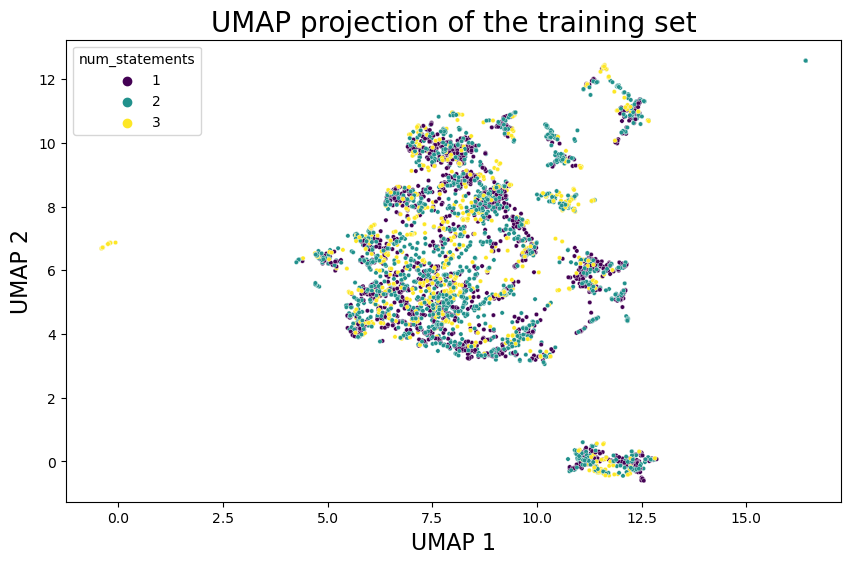

In [38]:
# Umap for dimensionality reduction
from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# make the points smaller
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=y_train_3, palette='viridis', s=10)
plt.title('UMAP projection of the training set', fontsize=20)
plt.xlabel('UMAP 1', fontsize=16)
plt.ylabel('UMAP 2', fontsize=16)
plt.show()


### Decision Tree

              precision    recall  f1-score   support

           1       0.85      0.79      0.82       258
           2       0.54      0.64      0.59       123
           3       0.54      0.43      0.48        35

    accuracy                           0.72       416
   macro avg       0.64      0.62      0.63       416
weighted avg       0.73      0.72      0.72       416



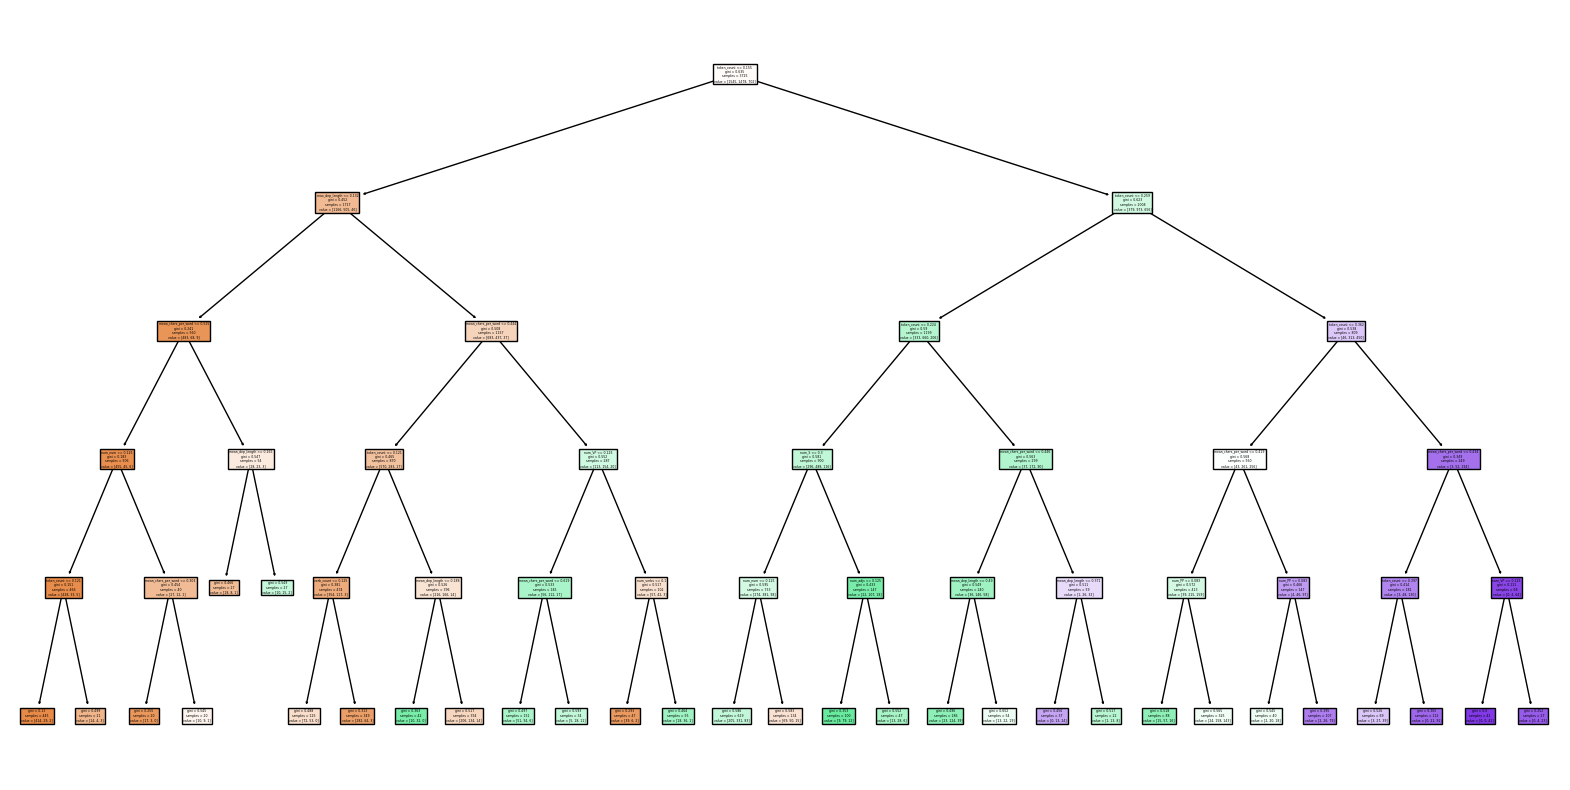

In [60]:
general_importance =  list(importance_all_3[:25])
intersection = X_train.columns.intersection(general_importance)

X_train_10 = X_train[intersection] 
X_test_10 = X_test[intersection]

# decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=5, min_samples_split=20, min_samples_leaf=20) 

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train_3)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))

# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train_10.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()


In [61]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- token_count <= 0.16
|   |--- max_dep_length <= 0.13
|   |   |--- mean_chars_per_word <= 0.53
|   |   |   |--- num_num <= 0.12
|   |   |   |   |--- token_count <= 0.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- token_count >  0.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- num_num >  0.12
|   |   |   |   |--- mean_chars_per_word <= 0.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- mean_chars_per_word >  0.30
|   |   |   |   |   |--- class: 1
|   |   |--- mean_chars_per_word >  0.53
|   |   |   |--- mean_dep_length <= 0.17
|   |   |   |   |--- class: 1
|   |   |   |--- mean_dep_length >  0.17
|   |   |   |   |--- class: 2
|   |--- max_dep_length >  0.13
|   |   |--- mean_chars_per_word <= 0.44
|   |   |   |--- token_count <= 0.12
|   |   |   |   |--- verb_count <= 0.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- verb_count >  0.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- token_count >  0.12
|   |   |   |   |--- mean_dep_length <= 0.

##### only two classes (1 statement versus >1 statement)

In [72]:
y_train_simple = y_train.apply(lambda x: 1 if x == 1 else 2)
y_test_simple = y_test.apply(lambda x: 1 if x == 1 else 2)

In [73]:
# decision tree with simple labels
# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=2, min_samples_split=3, min_samples_leaf=7)#, class_weight="balanced")

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train, y_train_simple)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.87      0.80      0.83       258
           2       0.71      0.80      0.75       158

    accuracy                           0.80       416
   macro avg       0.79      0.80      0.79       416
weighted avg       0.81      0.80      0.80       416



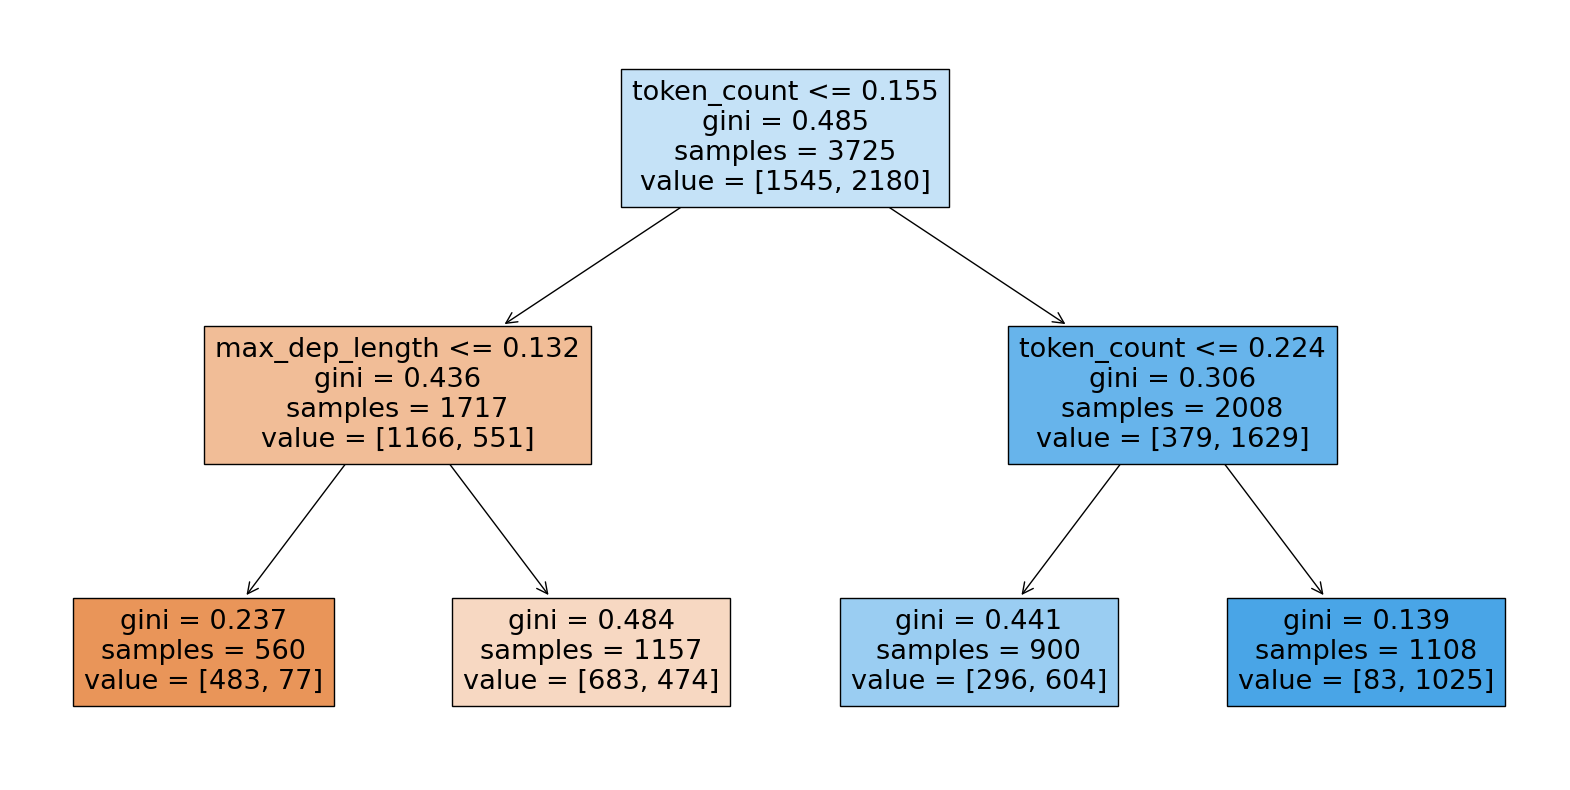

In [74]:
# print decision tree with column names

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cols = [a for a in X_train.columns]

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=cols, filled=True)
plt.show()

In [75]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- token_count <= 0.16
|   |--- max_dep_length <= 0.13
|   |   |--- class: 1
|   |--- max_dep_length >  0.13
|   |   |--- class: 1
|--- token_count >  0.16
|   |--- token_count <= 0.22
|   |   |--- class: 2
|   |--- token_count >  0.22
|   |   |--- class: 2



In [76]:
# decision tree with simple labels
# Initialisiere den Decision Tree Klassifikator
dt_clf = DecisionTreeClassifier(random_state= 42, criterion="gini", max_depth=1, min_samples_split=3, min_samples_leaf=7)#, class_weight="balanced")

X_train_10 = X_train
X_test_10 = X_test

# Trainiere den Decision Tree Klassifikator
dt_clf.fit(X_train_10, y_train_simple)

# Mache Vorhersagen
y_pred = dt_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.87      0.80      0.83       258
           2       0.71      0.80      0.75       158

    accuracy                           0.80       416
   macro avg       0.79      0.80      0.79       416
weighted avg       0.81      0.80      0.80       416



In [77]:
from sklearn import tree
text_representation = tree.export_text(dt_clf, feature_names=cols)
print(text_representation)

|--- token_count <= 0.16
|   |--- class: 1
|--- token_count >  0.16
|   |--- class: 2



### unorganized rest

In [78]:
# all data

# logistic regression 
from sklearn.linear_model import LogisticRegression

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train
clf.fit(X_train, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.86      0.79      0.82       258
           2       0.50      0.53      0.52       123
           3       0.31      0.43      0.36        35

    accuracy                           0.69       416
   macro avg       0.56      0.58      0.57       416
weighted avg       0.71      0.69      0.69       416



In [79]:
general_importance =  list(importance_amr_3[:75])
intersection = X_train.columns.intersection(general_importance)

# X_train_10
X_train_10 = X_train[intersection]
X_test_10 = X_test[intersection]

# Initialisiere den Klassifikator
clf = LogisticRegression(max_iter=1000)
# fit to X_train_10
clf.fit(X_train_10, y_train_3)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))




              precision    recall  f1-score   support

           1       0.72      0.70      0.71       258
           2       0.36      0.39      0.37       123
           3       0.12      0.11      0.12        35

    accuracy                           0.56       416
   macro avg       0.40      0.40      0.40       416
weighted avg       0.56      0.56      0.56       416



In [80]:
# random forest x_train_10
from sklearn.ensemble import RandomForestClassifier

# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.70      0.60      0.64       258
           2       0.35      0.44      0.39       123
           3       0.22      0.29      0.25        28
           4       0.00      0.00      1.00         6
           5       1.00      0.00      0.00         1

    accuracy                           0.52       416
   macro avg       0.45      0.26      0.46       416
weighted avg       0.55      0.52      0.54       416



In [81]:
# random forest simple labels and X_train_10
# Initialisiere den Random Forest Klassifikator
rf_clf = RandomForestClassifier()

# Trainiere den Random Forest Klassifikator
rf_clf.fit(X_train_10, y_train_3)

# Mache Vorhersagen
y_pred = rf_clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_3, y_pred, zero_division=1))



              precision    recall  f1-score   support

           1       0.71      0.63      0.67       258
           2       0.36      0.41      0.38       123
           3       0.19      0.26      0.22        35

    accuracy                           0.53       416
   macro avg       0.42      0.43      0.42       416
weighted avg       0.56      0.53      0.55       416



In [82]:
few_tokens = 0.16

y_train_few_tokens = y_train[X_train["token_count"] <= few_tokens]
y_test_few_tokens = y_test[X_test["token_count"] <= few_tokens]
y_train_many_tokens = y_train[X_train["token_count"] > few_tokens]
y_test_many_tokens = y_test[X_test["token_count"] > few_tokens]




from sklearn.metrics import accuracy_score
y_pred1 = [1] * len(y_test_few_tokens)
y_pred2 = [2] * len(y_test_many_tokens)
print(accuracy_score(y_pred1 + y_pred2, list(y_test_few_tokens) + list(y_test_many_tokens)))

y_pred1 = [1] * len(y_train_few_tokens)
y_pred2 = [2] * len(y_train_many_tokens)
print(accuracy_score(y_pred1 + y_pred2, list(y_train_few_tokens) + list(y_train_many_tokens)))

y_pred1 = [1] * len(y_test_few_tokens)
y_pred2 = [2] * len(y_test_many_tokens)
# y_test1 is 1 if y_test_few_tokens is 1, else 2
y_test1 = y_test_few_tokens.apply(lambda x: 1 if x == 1 else 2)
y_test2 = y_test_many_tokens.apply(lambda x: 1 if x == 1 else 2)
print(accuracy_score(y_pred1 + y_pred2, list(y_test1) + list(y_test2)))

y_pred1 = [1] * len(y_train_few_tokens)
y_pred2 = [2] * len(y_train_many_tokens)
# y_train1 is 1 if y_train_few_tokens is 1, else 2
y_train1 = y_train_few_tokens.apply(lambda x: 1 if x == 1 else 2)
y_train2 = y_train_many_tokens.apply(lambda x: 1 if x == 1 else 2)
print(accuracy_score(y_pred1 + y_pred2, list(y_train1) + list(y_train2)))



0.7163461538461539
0.3881879194630872
0.8004807692307693
0.47436241610738256


In [84]:
#support vector machine
from sklearn.svm import SVC

clf = SVC()#class_weight="balanced")
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.71      0.73      0.72       258
           2       0.55      0.46      0.50       158
           3       0.00      1.00      0.00         0

    accuracy                           0.63       416
   macro avg       0.42      0.73      0.41       416
weighted avg       0.65      0.63      0.64       416



In [85]:
# mlp
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state= 42)
clf.fit(X_train_10, y_train)

# Mache Vorhersagen
y_pred = clf.predict(X_test_10)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_simple, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.69      0.58      0.63       258
           2       0.44      0.45      0.45       158
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0

    accuracy                           0.53       416
   macro avg       0.28      0.76      0.27       416
weighted avg       0.60      0.53      0.56       416



c:\Users\Wiebke Petersen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Todo
- amr: length of list feature
- depTree: number root feature
- augmented basic and tree features
- combine train + test+ augmented for training
- BERT classifier

